In [1]:
!pip3 install opencv-python==3.4.2.16

!pip3 install opencv-contrib-python==3.4.2.16

    100% |████████████████████████████████| 25.0MB 1.6MB/s 
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20
    100% |████████████████████████████████| 30.6MB 1.2MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# to download and unzip images uncomment the code below

#!wget https://pysource.com/wp-content/uploads/2018/07/images_image_comparison.zip

#!unzip images_image_comparison.zip

--2019-01-24 12:55:43--  https://pysource.com/wp-content/uploads/2018/07/images_image_comparison.zip
Resolving pysource.com (pysource.com)... 104.31.86.117, 104.31.87.117, 2606:4700:30::681f:5775, ...
Connecting to pysource.com (pysource.com)|104.31.86.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24391768 (23M) [application/zip]
Saving to: ‘images_image_comparison.zip’

images_image_compar 100%[===================>]  23.26M  8.40MB/s    in 2.8s    

2019-01-24 12:55:47 (8.40 MB/s) - ‘images_image_comparison.zip’ saved [24391768/24391768]

Archive:  images_image_comparison.zip
   creating: images/
  inflating: images/black_and_white.jpg  
  inflating: images/blurred.jpg      
  inflating: images/blu_filer.jpg    
  inflating: images/cartoonized.jpg  
  inflating: images/duplicate.jpg    
  inflating: images/exposured.jpg    
  inflating: images/mixed_colors.jpg  
  inflating: images/old_photo.jpg    
  inflating: images/original_golden_bridge.jpg  
  inf

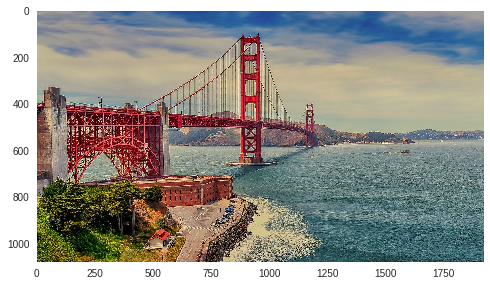

In [4]:
# loading original image
original = cv2.imread("images/original_golden_bridge.jpg")

plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

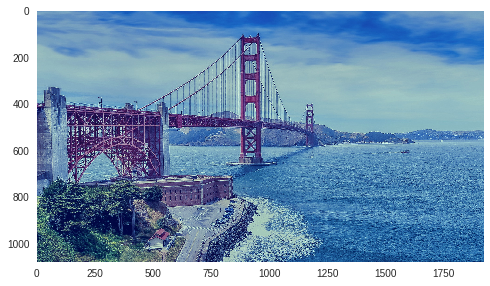

In [5]:
# image with max blue color
blue = cv2.imread("images/blu_filer.jpg")
plt.imshow(cv2.cvtColor(blue, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

images are not equal


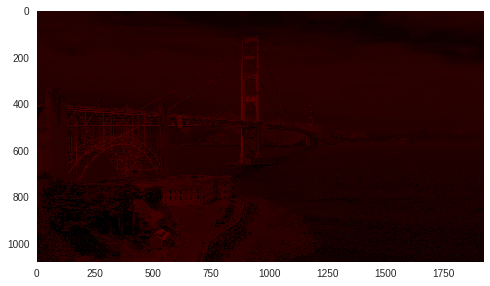

In [6]:
# to see if images are exactly equal
difference_original_blue = cv2.subtract(original, blue)

plt.imshow(cv2.cvtColor(difference_original_blue, cv2.COLOR_BGR2RGB))

# splitting the image into separate RGB channels
b,g,r = cv2.split(difference_original_blue)

if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
    print("images are exactly same")
else:
    print("images are not equal")

plt.grid(False)
plt.show()

In [0]:
# to see if two images are similar or not

# sift is used to find similarities between 2 images
sift = cv2.xfeatures2d.SIFT_create()

# key points and descriptors 
key_1, desc_1 = sift.detectAndCompute(original, None)
key_2, desc_2 = sift.detectAndCompute(blue, None)

index_params = dict(algorithm=0, trees=5)
search_params = dict()

# finding matches using K-nearest neighbours by comparing descriptors of both the images
match_finder = cv2.FlannBasedMatcher(index_params, search_params)
matches = match_finder.knnMatch(desc_1, desc_2, k=2)

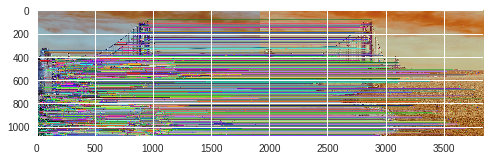

In [8]:
# it is a good match if the distance between two features is less
# a high match score means the image is a lot similar
match_ratio = 0.7
good_match = []

for i,j in matches:
    if i.distance < match_ratio*j.distance:
        good_match.append(i)
        
# visualising the matches found
output = cv2.drawMatches(original, key_1, blue, key_2, good_match, None)

plt.imshow(output)
# the lines show the matches found